# Exploratory Data Analysis

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load the data
First, we will load the data and see how it looks like.

In [20]:
# Load the data
data_path = './data/WILDCATS.CSV'
data = pd.read_csv(data_path)
data.head()

,class id,filepaths,labels,data set,scientific name
0,0,train/AFRICAN LEOPARD/001.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
1,0,train/AFRICAN LEOPARD/002.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
2,0,train/AFRICAN LEOPARD/003.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
3,0,train/AFRICAN LEOPARD/004.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus
4,0,train/AFRICAN LEOPARD/005.jpg,AFRICAN LEOPARD,train,Panthera pardus pardus


So, we have a dataframe with information about the animals: it's `class id`, it's name - `labels`, and also the `scientific name`. We also have the `filepaths` to the images, containing those animals. The `data set` column indicates if the sample is for training, validation, or testing.

In [22]:
data.describe()

,class id
count,2439.000000
mean,4.496105
std,2.880140
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


Second step is to check for missing values.

In [23]:
# Check for missing values
data.isnull().sum()

class id           0
filepaths          0
labels             0
data set           0
scientific name    0
dtype: int64

There are no missing values in the dataset, great! Let's see how many different animals we have in the dataset, and how many samples we have for each one.

In [24]:
# Check the distribution of the target variable
data['labels'].value_counts()

labels
JAGUAR             248
TIGER              247
AFRICAN LEOPARD    246
CARACAL            246
PUMA               246
CHEETAH            245
OCELOT             243
SNOW LEOPARD       241
CLOUDED LEOPARD    239
LIONS              238
Name: count, dtype: int64

Different animals have different number of samples, but the distribution is not that bad. Let's see it in percentage.

In [25]:
# Check the distribution of each label
data['labels'].value_counts(normalize=True)

labels
JAGUAR             0.101681
TIGER              0.101271
AFRICAN LEOPARD    0.100861
CARACAL            0.100861
PUMA               0.100861
CHEETAH            0.100451
OCELOT             0.099631
SNOW LEOPARD       0.098811
CLOUDED LEOPARD    0.097991
LIONS              0.097581
Name: proportion, dtype: float64

The distribution of the target variable is not balanced, but it's not that bad. Let's plot the distribution of the target variable.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'JAGUAR'),
  Text(1, 0, 'TIGER'),
  Text(2, 0, 'AFRICAN LEOPARD'),
  Text(3, 0, 'CARACAL'),
  Text(4, 0, 'PUMA'),
  Text(5, 0, 'CHEETAH'),
  Text(6, 0, 'OCELOT'),
  Text(7, 0, 'SNOW LEOPARD'),
  Text(8, 0, 'CLOUDED LEOPARD'),
  Text(9, 0, 'LIONS')])

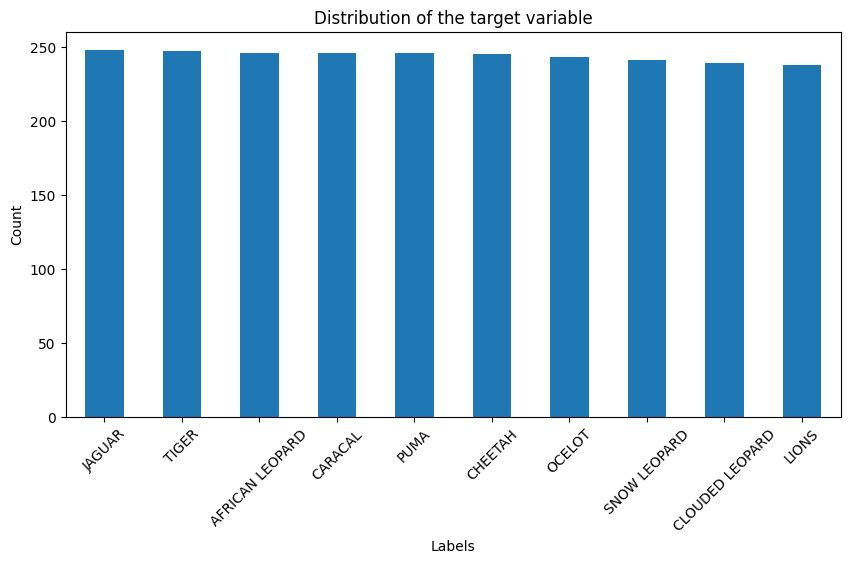

In [26]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
data['labels'].value_counts().plot(kind='bar')
plt.title('Distribution of the target variable')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of the target variable')

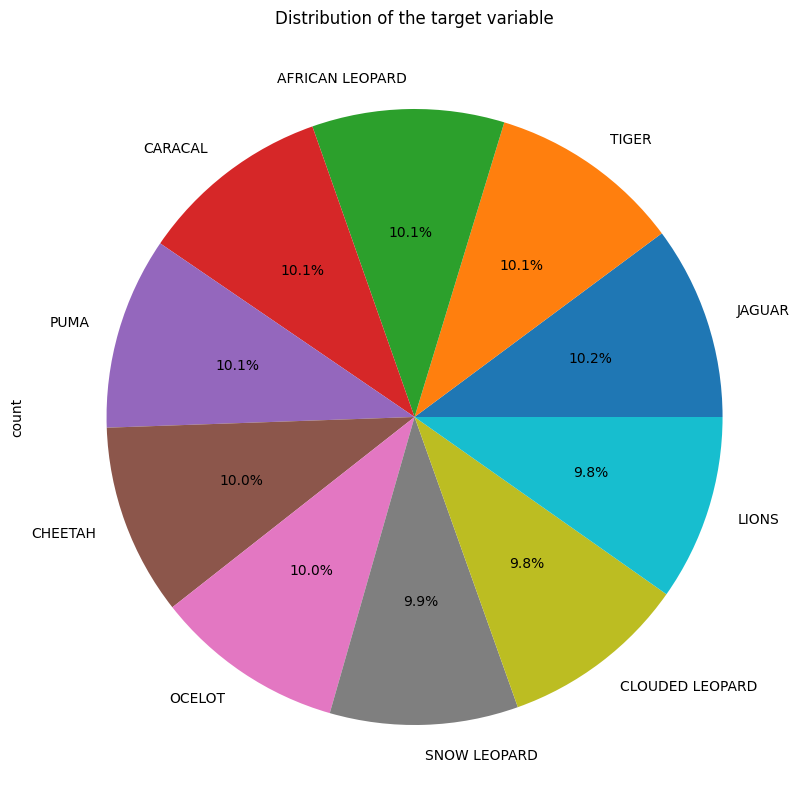

In [27]:
# Pie chart
plt.figure(figsize=(10, 10))
data['labels'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the target variable')

I guess, not so bad. Let's move on and check the images.

## Images
As the project has different structure, the images are not in the same folder as the notebook. So, we need to change the filepaths to the correct path.

In [28]:
# Load images
images = data['filepaths']

# Change the filepaths to the correct path
images = images.apply(lambda x: os.path.join(os.path.dirname(os.getcwd()), 'data', x))
images.head()

0    D:\PycharmProjects\Winstars_internship\Task 2\...
1    D:\PycharmProjects\Winstars_internship\Task 2\...
2    D:\PycharmProjects\Winstars_internship\Task 2\...
3    D:\PycharmProjects\Winstars_internship\Task 2\...
4    D:\PycharmProjects\Winstars_internship\Task 2\...
Name: filepaths, dtype: object

Now, let's display some of the images.

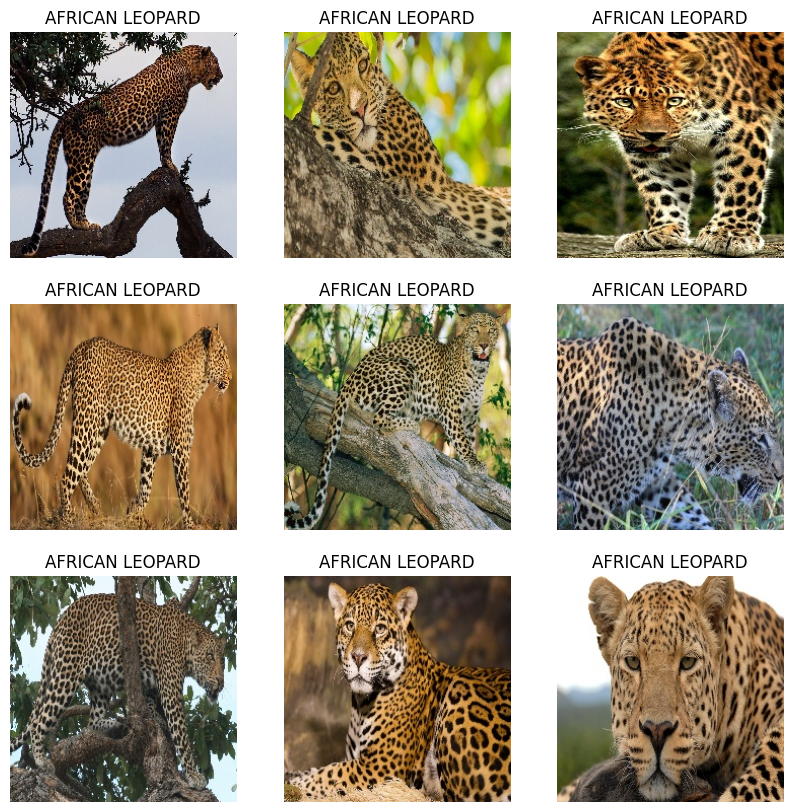

In [29]:
# Display the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(images[i])
    plt.imshow(img)
    plt.axis('off')
    # Display the label
    plt.title(data['labels'][i])

The images look squeezed, let's check the dimensions of the images.

In [30]:
# Get the image dimensions
img = plt.imread(images[0])
img.shape

(224, 224, 3)

Does all the images have the same dimensions?

In [31]:
# Check the distribution of the image dimensions
image_shapes = images.apply(lambda x: plt.imread(x).shape)
image_shapes.value_counts()

filepaths
(224, 224, 3)    2439
Name: count, dtype: int64

Definitely, the images have the same dimensions. Let's move on and check the data set split.

In [32]:
# Check train/validation/test split
data['data set'].value_counts()

data set
train    2339
test       50
valid      50
Name: count, dtype: int64

In [33]:
# Check the distribution of the data set
data['data set'].value_counts(normalize=True)

data set
train    0.9590
test     0.0205
valid    0.0205
Name: proportion, dtype: float64

It's better to understand the distribution like this.

In [34]:
print(f"There are {data['data set'].value_counts()['train']} training samples, which is {data['data set'].value_counts(normalize=True)['train']*100:.2f}% of the data.")
print(f"There are {data['data set'].value_counts()['valid']} validation samples, which is {data['data set'].value_counts(normalize=True)['valid']*100:.2f}% of the data.")
print(f"There are {data['data set'].value_counts()['test']} test samples, which is {data['data set'].value_counts(normalize=True)['test']*100:.2f}% of the data.")

There are 2339 training samples, which is 95.90% of the data.
There are 50 validation samples, which is 2.05% of the data.
There are 50 test samples, which is 2.05% of the data.


So, we have a dataset of 10 different animals, wildcats, with each being by approximately 10% of the data. Overall, there are 2439 images in the dataset. The images have the same dimensions, and they are already split into training, validation, and test sets.